# Playing with CAMB

In [1]:
%pylab inline
import numpy as np
import camb
from camb import model, initialpower

Populating the interactive namespace from numpy and matplotlib


### Setup cosmological model

In [2]:
pars = camb.CAMBparams()
#one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9,ns=0.965, r=0)

In [3]:
pars.set_matter_power(redshifts=[0.,2.0,5.0], kmax=10.0)
#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, zs, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=10, npoints = 200)
s8 = np.array(results.get_sigma8())
print(s8)

Note: redshifts have been re-sorted (earliest first)
[0.16995948 0.33503386 0.80258204]


### Plot matter power spectrum 

In [4]:
from matplotlib import pyplot as plt

Text(0.5,1,'Matter power at different redshifts')

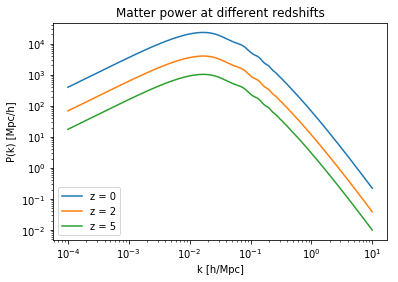

In [5]:
for i, z in enumerate(zs):
    plt.loglog(kh, pk[i,:],label='z = '+str(int(z)))
plt.xlabel('k [h/Mpc]')
plt.ylabel('P(k) [Mpc/h]')
plt.legend(loc='lower left')
plt.title('Matter power at different redshifts')

In [6]:
z=2.25
results.hubble_parameter(z)

229.79162843739516

In [7]:
results.angular_diameter_distance(z)

1734.611130325552